In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
sns.set_style('darkgrid')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
forest = pd.read_csv("forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

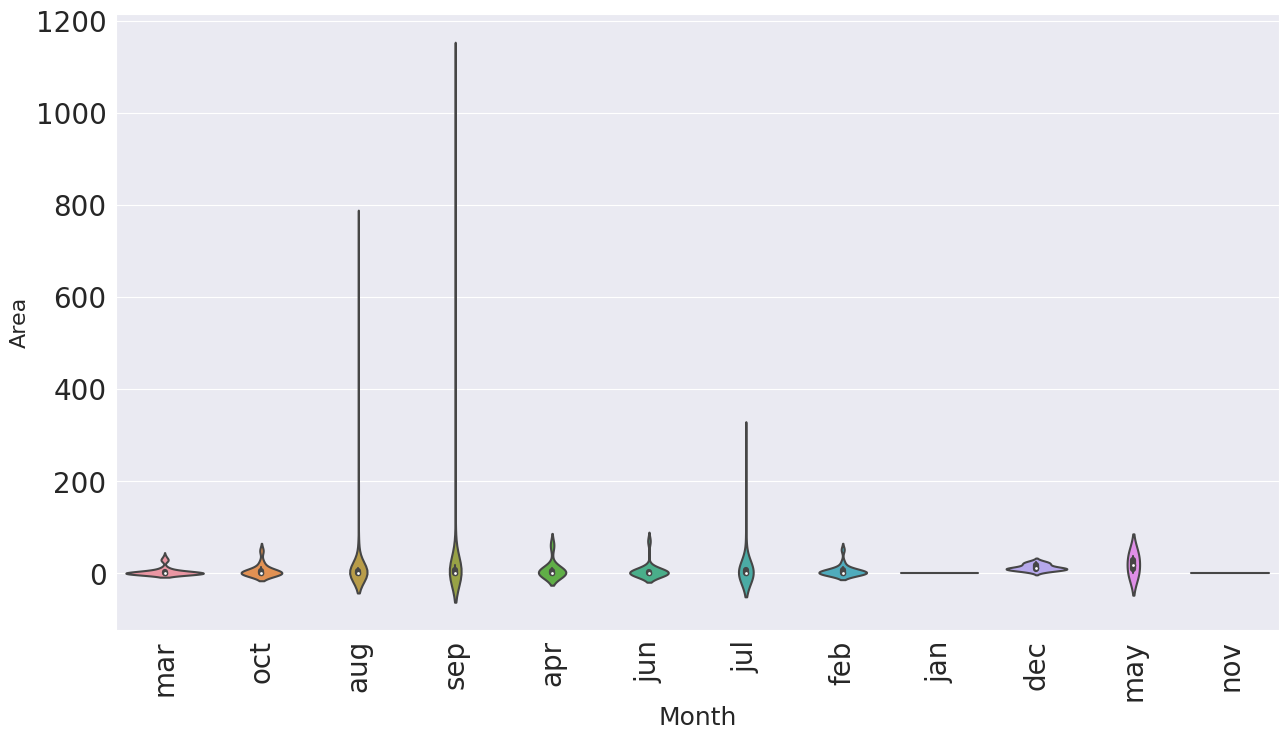

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x = 'month', y= "area",data = forest)
plt.xticks(rotation = 90, size = 20)
plt.yticks(size = 20)
plt.xlabel('Month',fontsize=18)
plt.ylabel('Area', fontsize=16)

plt.show()



In [ ]:
forest['area_km'] = forest['area'] / 100

forest.head()


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,area_km
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,0.0


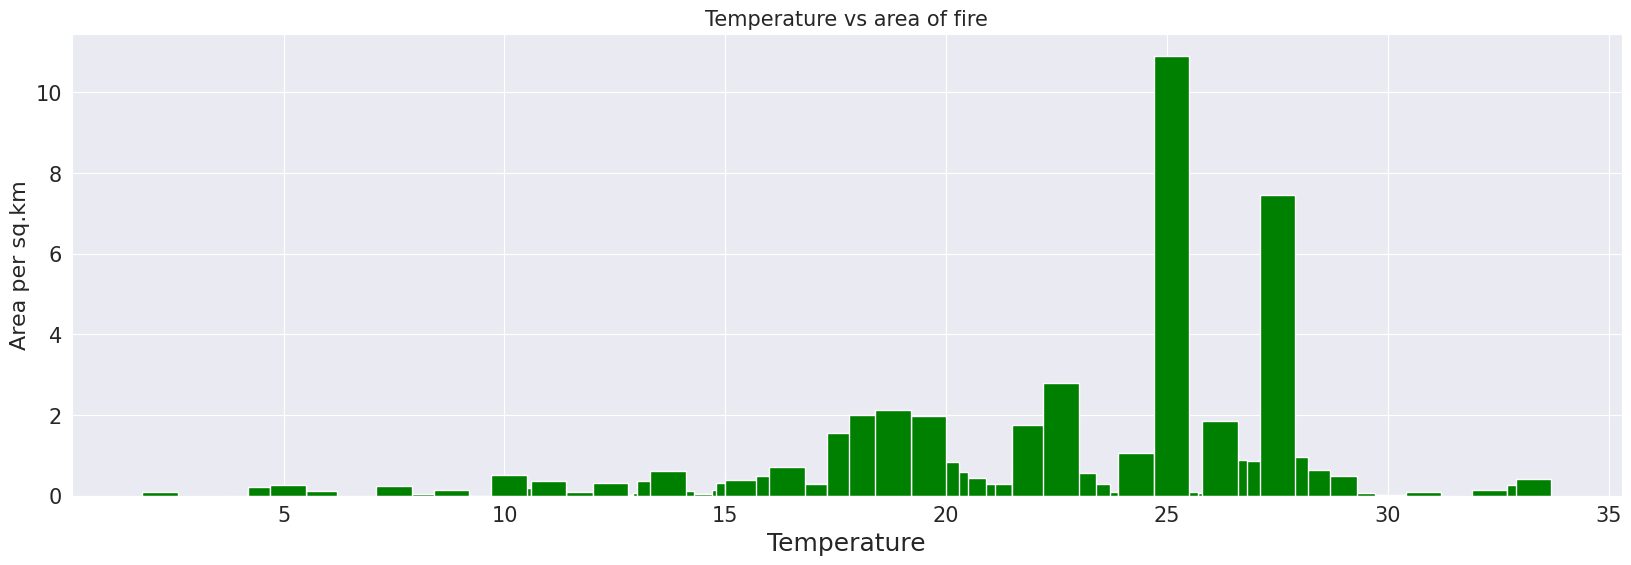

In [ ]:
highest_fire_area = forest.sort_values(by="area_km", ascending=True)

plt.figure(figsize=(20, 6))

plt.title("Temperature vs area of fire" , fontsize=15)
plt.bar(highest_fire_area['temp'], highest_fire_area['area_km'], color = "green")

plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel('Temperature',fontsize=18)
plt.ylabel('Area per sq.km', fontsize=16)
plt.show()



In [ ]:
numerical_feature = forest.describe(include=["int", "float"]).columns

print(list(numerical_feature))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep', 'area_km']


In [ ]:
categorical_feature = forest.describe(include=["object"]).columns

print(list(categorical_feature))



['month', 'day', 'size_category']


### Categorical features

Index(['month', 'day', 'size_category'], dtype='object')


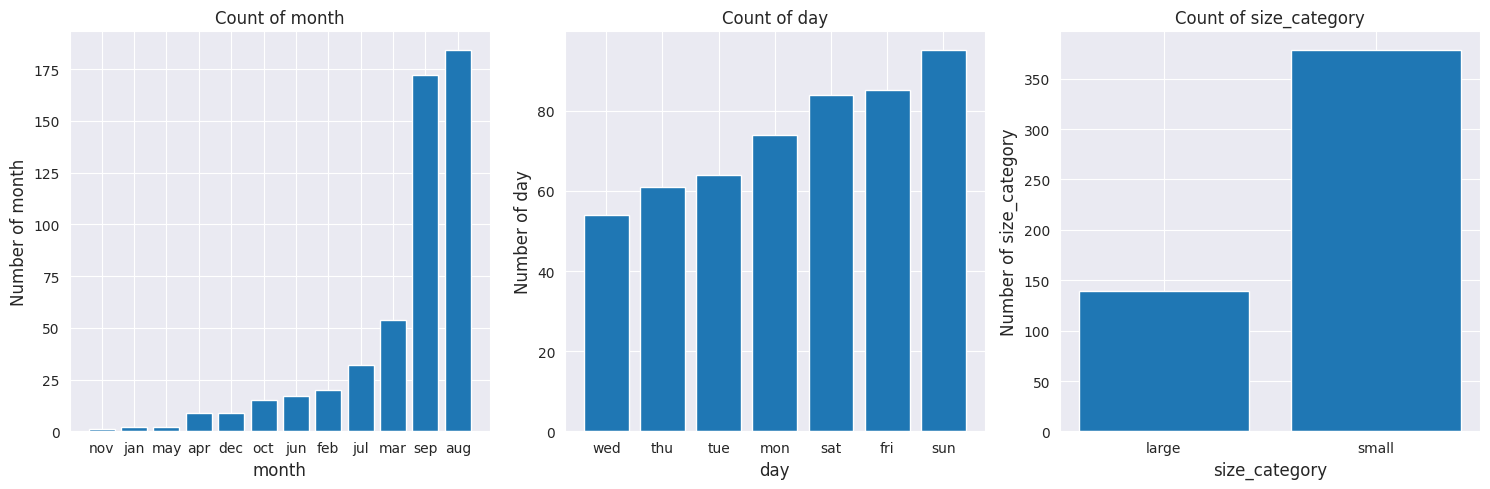

In [ ]:
print(categorical_feature)


plt.figure(figsize=(15, 5))
for idx, column in enumerate(categorical_feature):
    df = forest.copy()
    unique = df[column].value_counts(ascending=True);

    plt.subplot(1, 3, idx+1)
    plt.title("Count of "+ column)
    plt.bar(unique.index, unique.values);

    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

plt.tight_layout()
plt.show()



### Numerical features


In [ ]:
sns.set_style('ticks')
sns.pairplot(forest[numerical_feature])
plt.show()

### Outliers


<ipython-input-14-e2d366fbecae>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


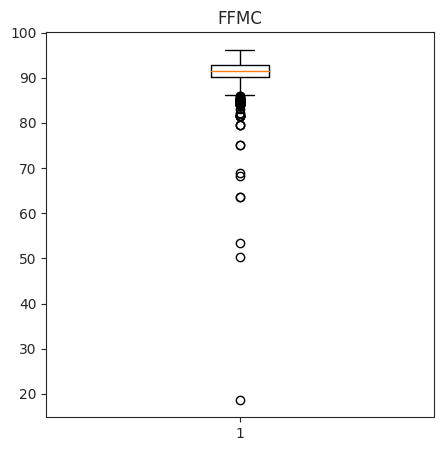

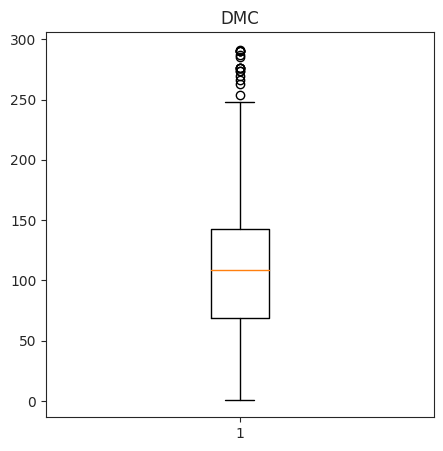

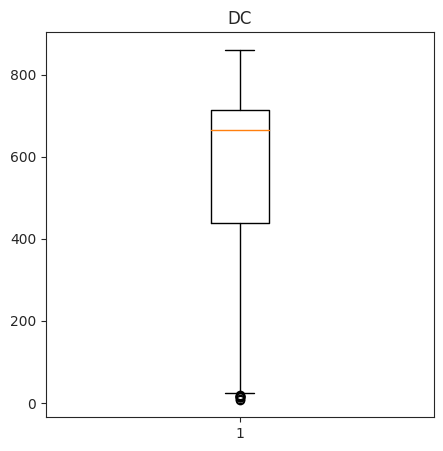

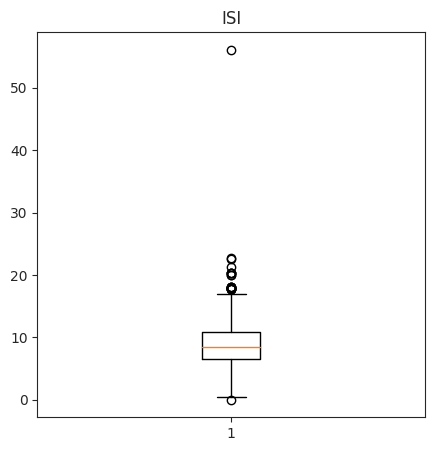

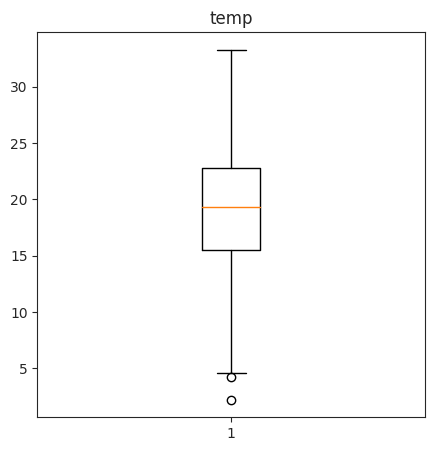

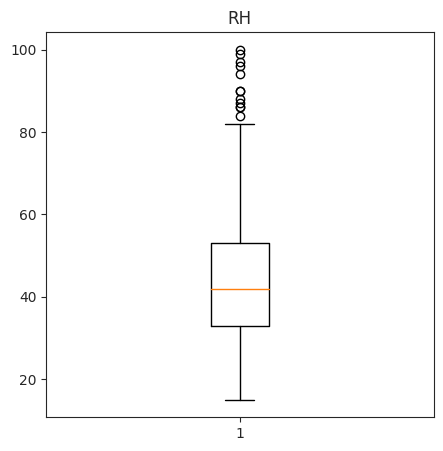

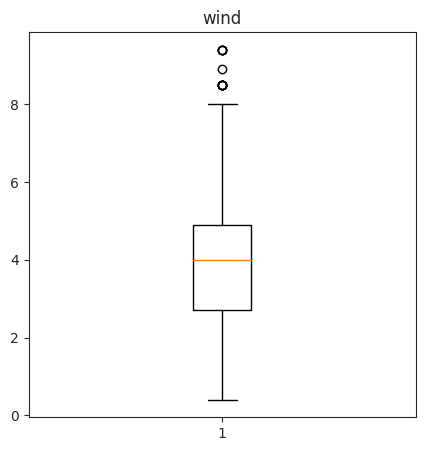

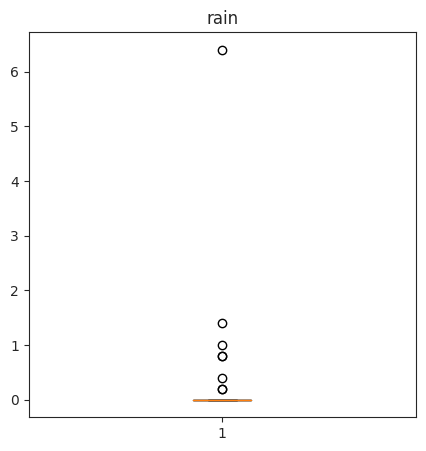

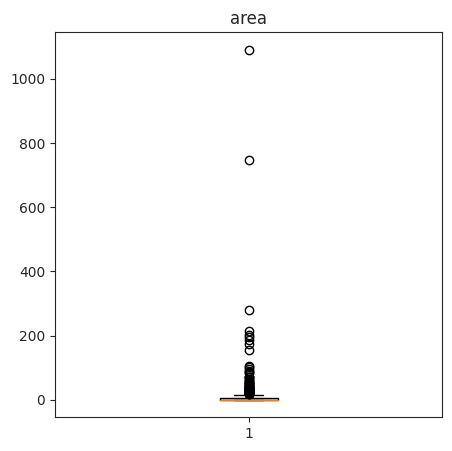

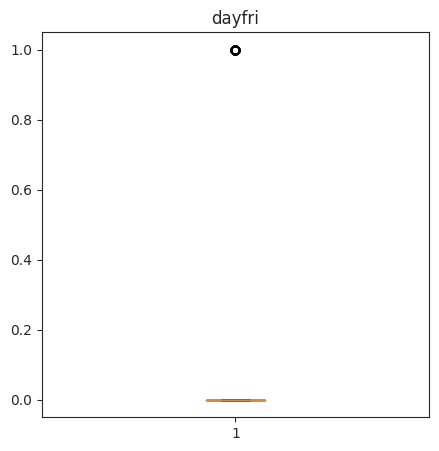

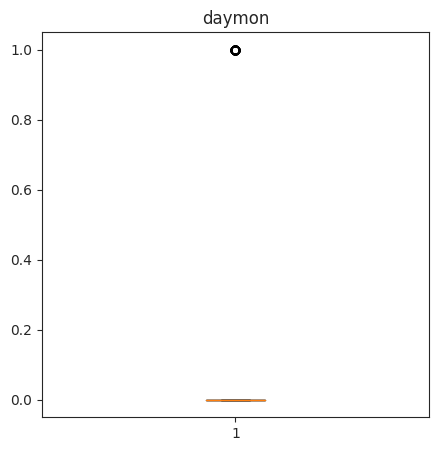

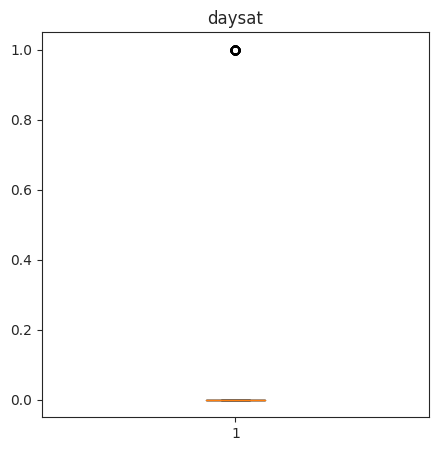

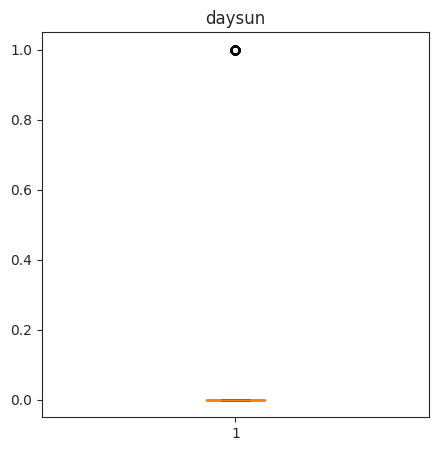

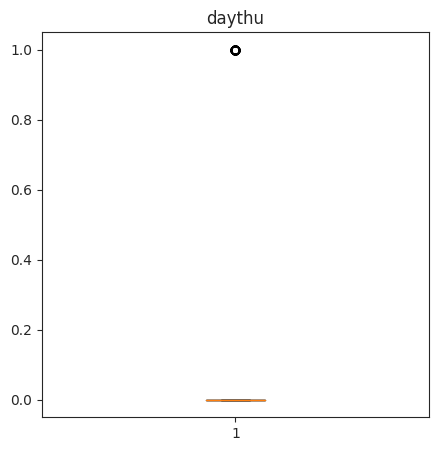

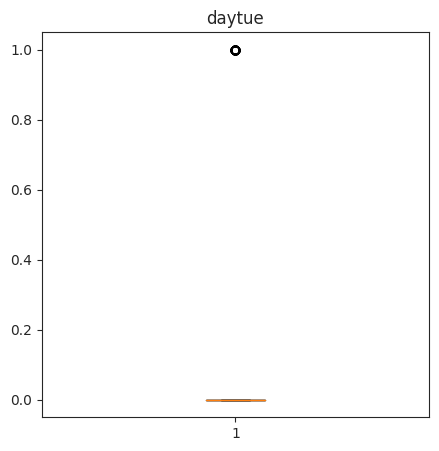

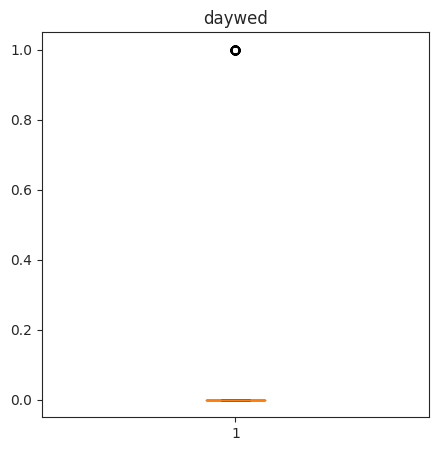

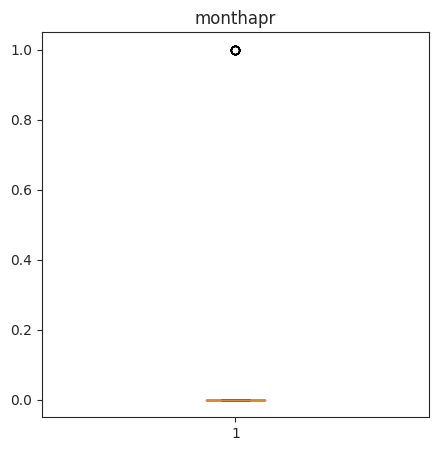

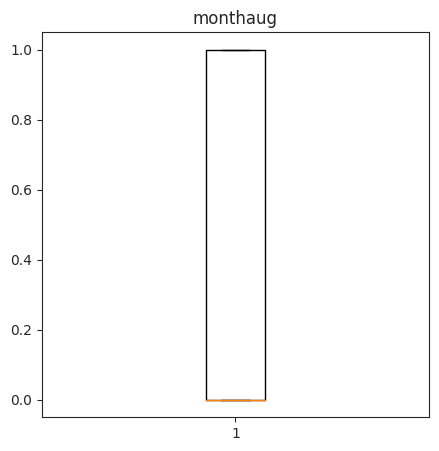

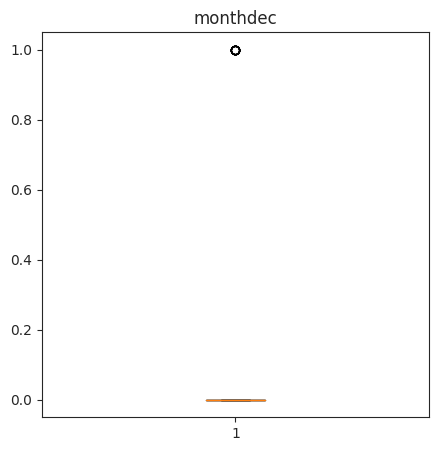

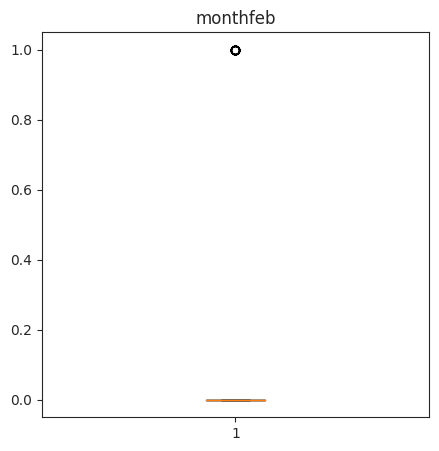

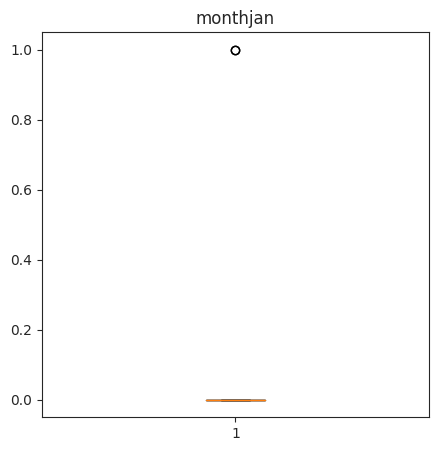

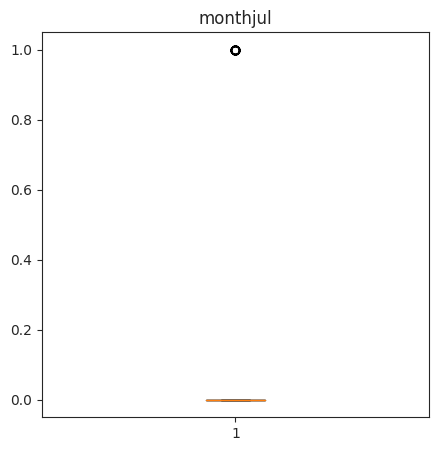

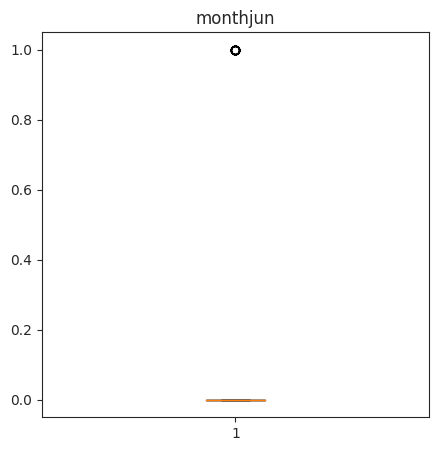

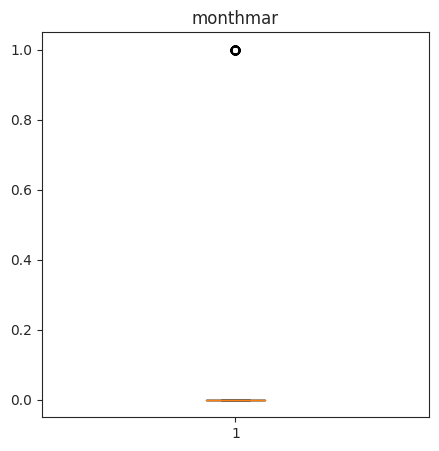

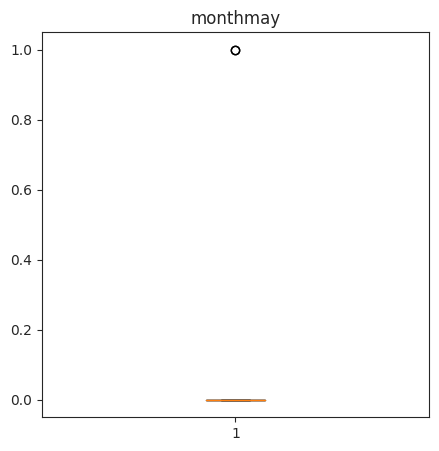

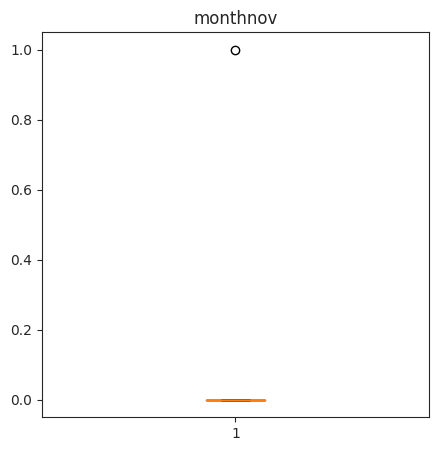

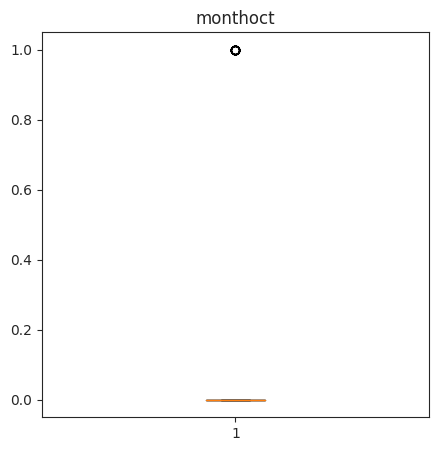

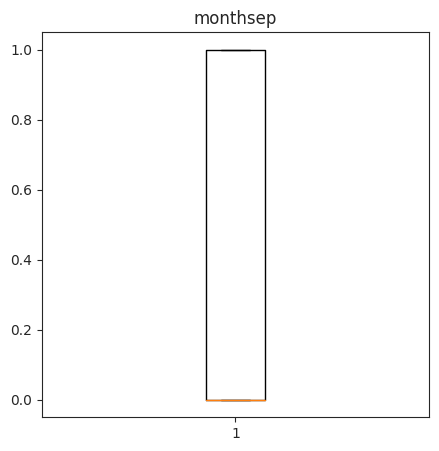

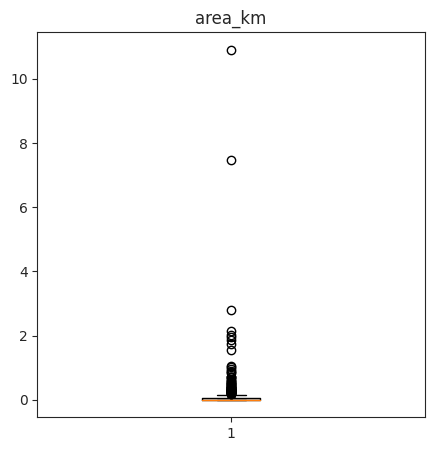

In [ ]:

for idx, col  in enumerate(numerical_feature, 1):
    plt.figure(figsize=(5,5))
    plt.boxplot(forest[col])

    plt.title(col)

#plt.tight_layout()
plt.show(plt)



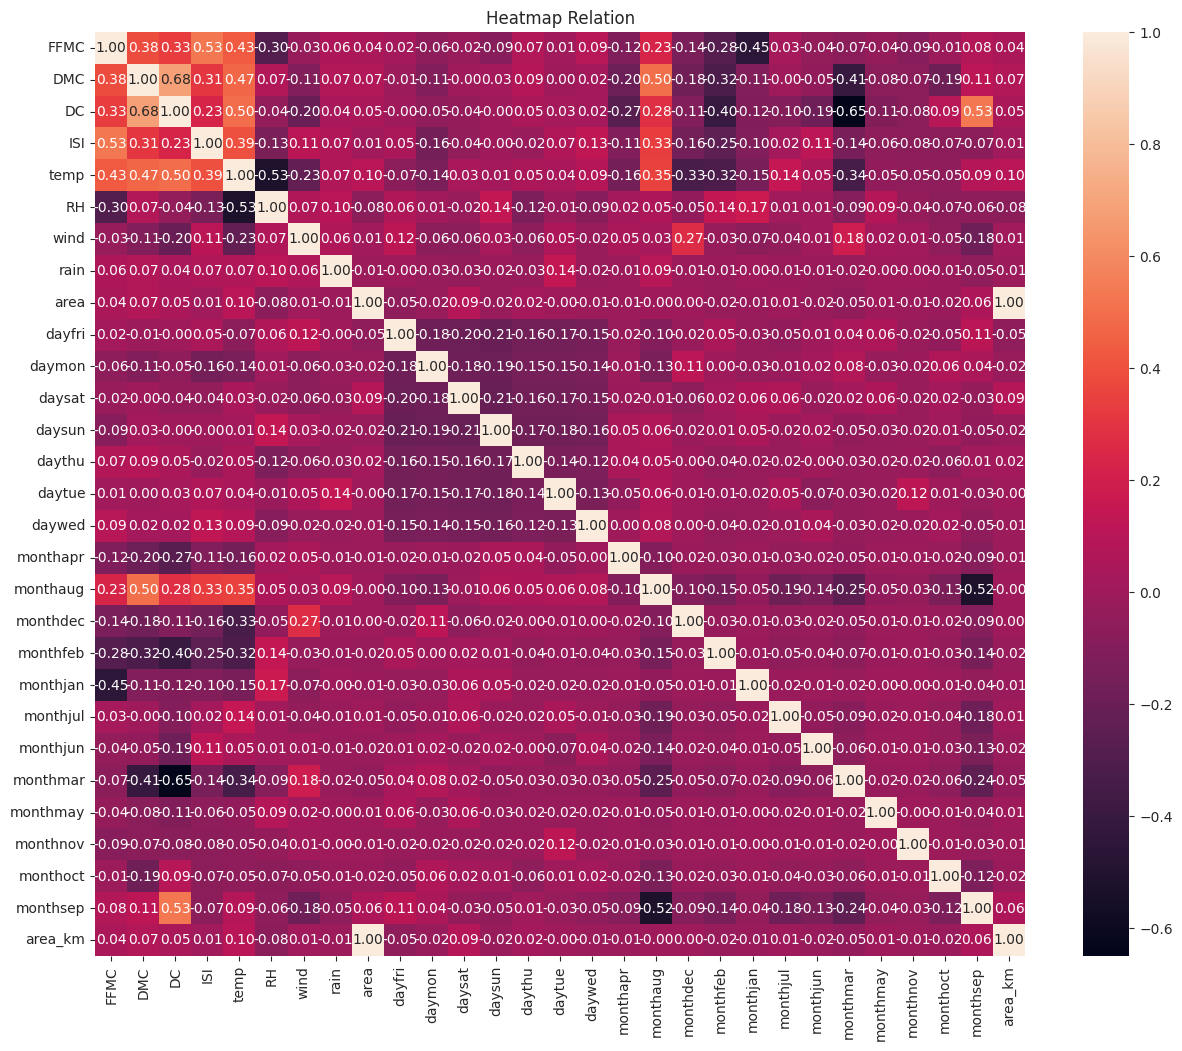

In [ ]:
#heatmap
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(forest[numerical_feature].corr(), annot=True, fmt='.2f');



In [ ]:
#Dropping the month and day columns
forest.drop(["month","day"],axis=1,inplace =True)

X = forest.iloc[:,0:28]
y = forest.iloc[:,28]



In [ ]:
# Normalizing the data
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

X_ = norm_func(X)



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

X_train,X_test,y_train,y_test = train_test_split(X_,y,test_size = 0.25, stratify = y)



In [ ]:
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train,y_train)
pred_test = model_linear.predict(X_test)
np.mean(pred_test==y_test)



0.7384615384615385

In [ ]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(X_train,y_train)
pred_test_rbf = model_rbf.predict(X_test)
np.mean(pred_test_rbf==y_test)



0.7384615384615385

In [ ]:
# Kernel = poly
model_poly = SVC(kernel = "poly")
model_poly.fit(X_train,y_train)
pred_test_poly = model_poly.predict(X_test)

np.mean(pred_test_poly==y_test)



0.7384615384615385

In [ ]:
#'sigmoid'
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(X_train,y_train)
pred_test_sig = model_sig.predict(X_test)

np.mean(pred_test_sig==y_test)



0.7307692307692307

### Parameters selection

In [ ]:

SVMC = SVC(random_state=42)

svc_param_grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'],
                  'gamma': [1, 0.1, 0.01, 0.001],
                  'C': [1000, 100, 10, 1],
                  'tol':[0.001,0.0008,0.0009,0.0011]}

gsSVMC = GridSearchCV(SVMC, param_grid = svc_param_grid, cv = 5, scoring = "accuracy", n_jobs = 6, verbose = 1)

gsSVMC.fit(X_train,y_train)

svm_best = gsSVMC.best_estimator_

gsSVMC.best_score_



Fitting 5 folds for each of 256 candidates, totalling 1280 fits


0.9405927405927406

In [ ]:
gsSVMC.best_params_


{'C': 1000, 'gamma': 1, 'kernel': 'linear', 'tol': 0.001}

In [ ]:
predict_results = svm_best.predict(X_test)
np.mean(predict_results==y_test)



0.9461538461538461

<Axes: >

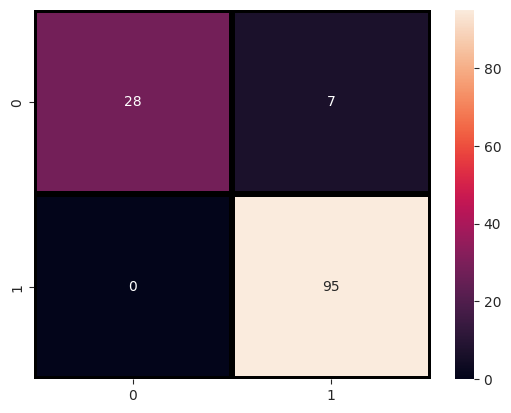

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, predict_results),annot=True,fmt = "d",linecolor="k",linewidths=3)